In [1]:
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [93]:
from google.colab import drive
drive.mount ('/drive')
df = pd.read_csv('/drive/MyDrive/sifilis_congenita_base_tratada.csv')
df.head()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


,Unnamed: 0,DT_NOTIFIC,NU_ANO,NU_IDADE_N,CS_SEXO,CS_RACA,ID_MN_RESI,ANT_IDADE,ANT_RACA,ESCOLMAE,ANT_PRE_NA,ANTSIFIL_N,LAB_PARTO,LAB_CONF,TRA_ESQUEM,ANT_TRATAD,LABC_SANGU,LABC_LIQUO,LABC_TITUL,LABC_EVIDE,LABC_LIQ_1,TRA_DIAG_T,CLI_ICTERI,CLI_RINITE,CLI_ANEMIA,CLI_ESPLEN,HEPATO,CLI_OSTEO,LESOES,CLI_PSEUDO,CLI_OUTRO,TRA_ESQU_1,EVOLUCAO,EVO_DIAG_N
0,0,2013-01-18,2013,Menos de 1 mês,Ignorado,Ignorada,355030,26.0,Ignorada,Ignorada,Não,No momento do parto/curetagem,Não reagente,Reagente,Não realizado,Não,Não realizado,Não realizado,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não realizado,Aborto,Aborto
1,1,2013-05-06,2013,Menos de 1 mês,Masculino,Parda,351630,20.0,Parda,Ensino médio completo,Ignorado,Ignorado,Ignorado,Reagente,Ignorado,Ignorado,Reagente,Não reagente,Ignorado,Ignorado,Sim,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Vivo,Sífilis congênita recente
2,2,2013-04-30,2013,Menos de 1 mês,Feminino,Branca,355030,17.0,Branca,Ignorada,Sim,Durante o pré-natal,Reagente,Reagente,Inadequado,Não,Reagente,Não reagente,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Penicilina benzatina,Vivo,Sífilis congênita recente
3,3,2013-04-29,2013,Menos de 1 mês,Masculino,Parda,353980,24.0,Parda,Ignorada,Sim,Durante o pré-natal,Não reagente,Reagente,Inadequado,Não,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Não,Não,Não,Não,Não,Não,Não,Não,Não,Penicilina cristalina,Ignorado,Sífilis congênita recente
4,4,2013-05-03,2013,Menos de 1 mês,Masculino,Branca,355030,42.0,Branca,Ignorada,Sim,No momento do parto/curetagem,Reagente,Não realizado,Não realizado,Ignorado,Ignorado,Ignorado,Não se aplica,Não se aplica,Ignorado,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Penicilina cristalina,Vivo,Sífilis congênita recente


In [94]:
data = df[['ANT_IDADE','ANT_RACA', 'ESCOLMAE','ANT_PRE_NA', 'ANTSIFIL_N','TRA_ESQUEM','ANT_TRATAD','EVOLUCAO', 'EVO_DIAG_N']]

In [95]:
data.isna().mean()*100

ANT_IDADE     1.352377
ANT_RACA      0.000000
ESCOLMAE      0.000000
ANT_PRE_NA    0.000000
ANTSIFIL_N    0.000000
TRA_ESQUEM    0.000000
ANT_TRATAD    0.000000
EVOLUCAO      0.000000
EVO_DIAG_N    0.000000
dtype: float64

In [96]:
data = data.dropna()

In [97]:
data.isna().mean()*100

ANT_IDADE     0.0
ANT_RACA      0.0
ESCOLMAE      0.0
ANT_PRE_NA    0.0
ANTSIFIL_N    0.0
TRA_ESQUEM    0.0
ANT_TRATAD    0.0
EVOLUCAO      0.0
EVO_DIAG_N    0.0
dtype: float64

In [98]:
idade = data['ANT_IDADE']

def decode_idade(idade):
  if idade >= 10 and idade <15:
    return '10 a 14 anos'
  elif idade >= 15 and idade <20:
    return '15 a 19 anos'
  elif idade >= 20 and idade <25:
    return '20 a 24 anos'
  elif idade >= 25 and idade <30:
    return '25 a 29 anos'
  elif idade >= 30 and idade <35:
    return '30 a 34 anos'
  elif idade >= 35 and idade <40:
    return '35 a 39 anos'
  elif idade >= 40 and idade <45:
    return '40 a 44 anos'
  elif idade >= 45 and idade <51:
    return '45 a 50 anos'
  else:
    return np.NaN

data['ANT_IDADE'] = list(map(decode_idade, idade))

In [99]:
data.ANT_IDADE.value_counts()

ANT_IDADE
20 a 24 anos    12497
25 a 29 anos     8157
15 a 19 anos     7138
30 a 34 anos     5003
35 a 39 anos     2563
40 a 44 anos      790
10 a 14 anos      192
45 a 50 anos       59
Name: count, dtype: int64

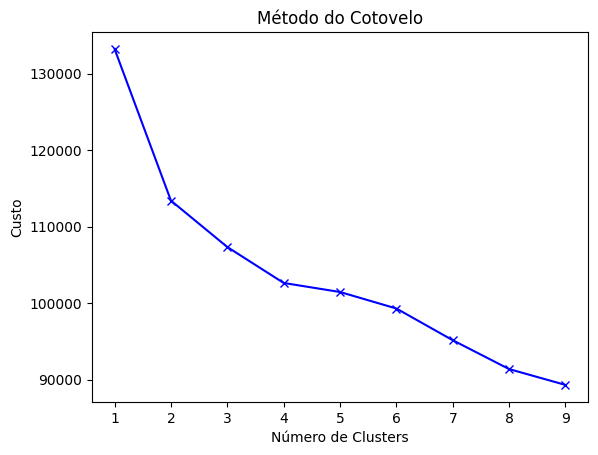

In [103]:
# Método do cotovelo para achar o K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = 'Cao', n_init = 5)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Custo')
plt.title('Método do Cotovelo')
plt.show()

In [108]:
kmode = KModes(n_clusters=4, init = 'Cao', n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5007, cost: 102638.0


array([1, 0, 0, ..., 1, 1, 1], dtype=uint16)

In [109]:
data.insert(0, "CLUSTER", clusters, True)
data.head()

,CLUSTER,ANT_IDADE,ANT_RACA,ESCOLMAE,ANT_PRE_NA,ANTSIFIL_N,TRA_ESQUEM,ANT_TRATAD,EVOLUCAO,EVO_DIAG_N
0,1,25 a 29 anos,Ignorada,Ignorada,Não,No momento do parto/curetagem,Não realizado,Não,Aborto,Aborto
1,0,20 a 24 anos,Parda,Ensino médio completo,Ignorado,Ignorado,Ignorado,Ignorado,Vivo,Sífilis congênita recente
2,0,15 a 19 anos,Branca,Ignorada,Sim,Durante o pré-natal,Inadequado,Não,Vivo,Sífilis congênita recente
3,0,20 a 24 anos,Parda,Ignorada,Sim,Durante o pré-natal,Inadequado,Não,Ignorado,Sífilis congênita recente
4,1,40 a 44 anos,Branca,Ignorada,Sim,No momento do parto/curetagem,Não realizado,Ignorado,Vivo,Sífilis congênita recente


In [110]:
data['CLUSTER'] = data['CLUSTER'].map({0 : 1 ,
                                   1 : 2,
                                   2 : 3,
                                   3 : 4})

In [111]:
data.head()

,CLUSTER,ANT_IDADE,ANT_RACA,ESCOLMAE,ANT_PRE_NA,ANTSIFIL_N,TRA_ESQUEM,ANT_TRATAD,EVOLUCAO,EVO_DIAG_N
0,2,25 a 29 anos,Ignorada,Ignorada,Não,No momento do parto/curetagem,Não realizado,Não,Aborto,Aborto
1,1,20 a 24 anos,Parda,Ensino médio completo,Ignorado,Ignorado,Ignorado,Ignorado,Vivo,Sífilis congênita recente
2,1,15 a 19 anos,Branca,Ignorada,Sim,Durante o pré-natal,Inadequado,Não,Vivo,Sífilis congênita recente
3,1,20 a 24 anos,Parda,Ignorada,Sim,Durante o pré-natal,Inadequado,Não,Ignorado,Sífilis congênita recente
4,2,40 a 44 anos,Branca,Ignorada,Sim,No momento do parto/curetagem,Não realizado,Ignorado,Vivo,Sífilis congênita recente


In [112]:
cluster_1 = data[data['CLUSTER'] == 1]
cluster_2 = data[data['CLUSTER'] == 2]
cluster_3 = data[data['CLUSTER'] == 3]
cluster_4 = data[data['CLUSTER'] == 4]

In [113]:
print('cluster 1:', cluster_1.shape)
print('cluster 2:', cluster_2.shape)
print('cluster 3:', cluster_3.shape)
print('cluster 4:', cluster_4.shape)

cluster 1: (21466, 10)
cluster 2: (7468, 10)
cluster 3: (3950, 10)
cluster 4: (3515, 10)


In [114]:
cluster_1.mode()

,CLUSTER,ANT_IDADE,ANT_RACA,ESCOLMAE,ANT_PRE_NA,ANTSIFIL_N,TRA_ESQUEM,ANT_TRATAD,EVOLUCAO,EVO_DIAG_N
0,1,20 a 24 anos,Parda,Ignorada,Sim,Durante o pré-natal,Inadequado,Não,Vivo,Sífilis congênita recente


In [115]:
cluster_2.mode()

,CLUSTER,ANT_IDADE,ANT_RACA,ESCOLMAE,ANT_PRE_NA,ANTSIFIL_N,TRA_ESQUEM,ANT_TRATAD,EVOLUCAO,EVO_DIAG_N
0,2,25 a 29 anos,Branca,Ensino médio completo,Sim,No momento do parto/curetagem,Não realizado,Não,Vivo,Sífilis congênita recente


In [116]:
cluster_3.mode()

,CLUSTER,ANT_IDADE,ANT_RACA,ESCOLMAE,ANT_PRE_NA,ANTSIFIL_N,TRA_ESQUEM,ANT_TRATAD,EVOLUCAO,EVO_DIAG_N
0,3,15 a 19 anos,Branca,Ensino médio incompleto,Sim,Durante o pré-natal,Ignorado,Ignorado,Vivo,Sífilis congênita recente


In [117]:
cluster_4.mode()

,CLUSTER,ANT_IDADE,ANT_RACA,ESCOLMAE,ANT_PRE_NA,ANTSIFIL_N,TRA_ESQUEM,ANT_TRATAD,EVOLUCAO,EVO_DIAG_N
0,4,15 a 19 anos,Branca,5ª a 8ª série incompleta,Não,No momento do parto/curetagem,Não realizado,Não,Vivo,Sífilis congênita recente


<function matplotlib.pyplot.show(close=None, block=None)>

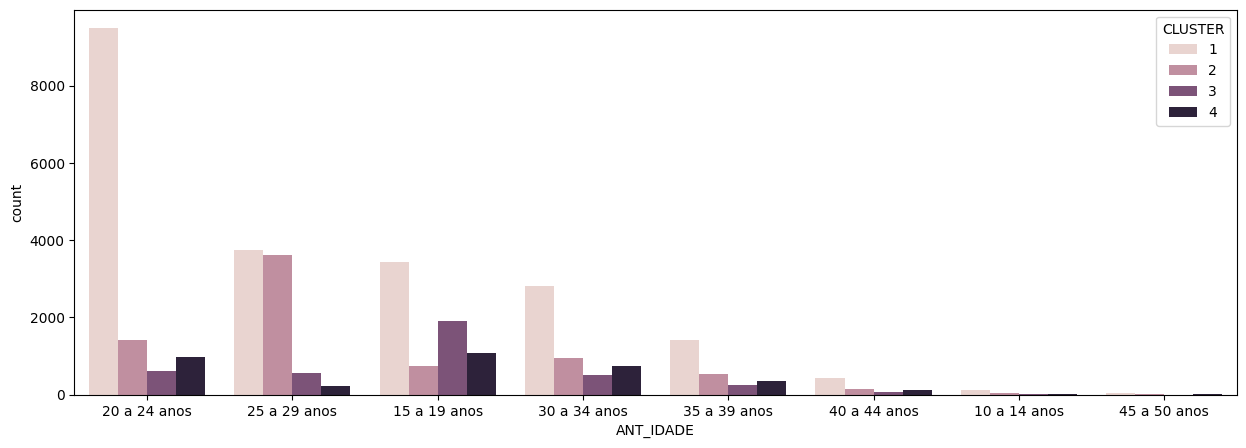

In [118]:
plt.subplots(figsize = (15,5))
sns.countplot(x = data['ANT_IDADE'], order = data['ANT_IDADE'].value_counts().index, hue = data['CLUSTER'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

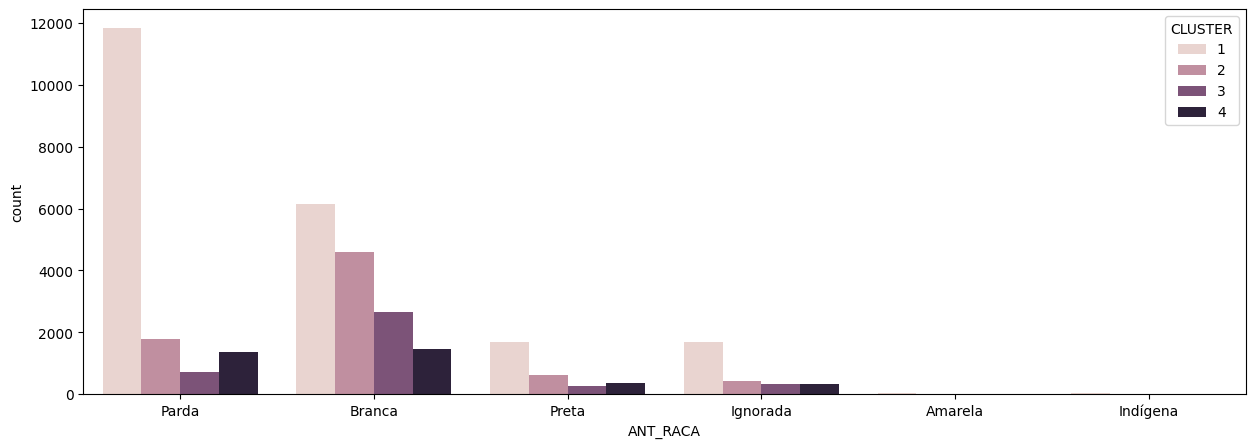

In [119]:
plt.subplots(figsize = (15,5))
sns.countplot(x = data['ANT_RACA'], order = data['ANT_RACA'].value_counts().index, hue = data['CLUSTER'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

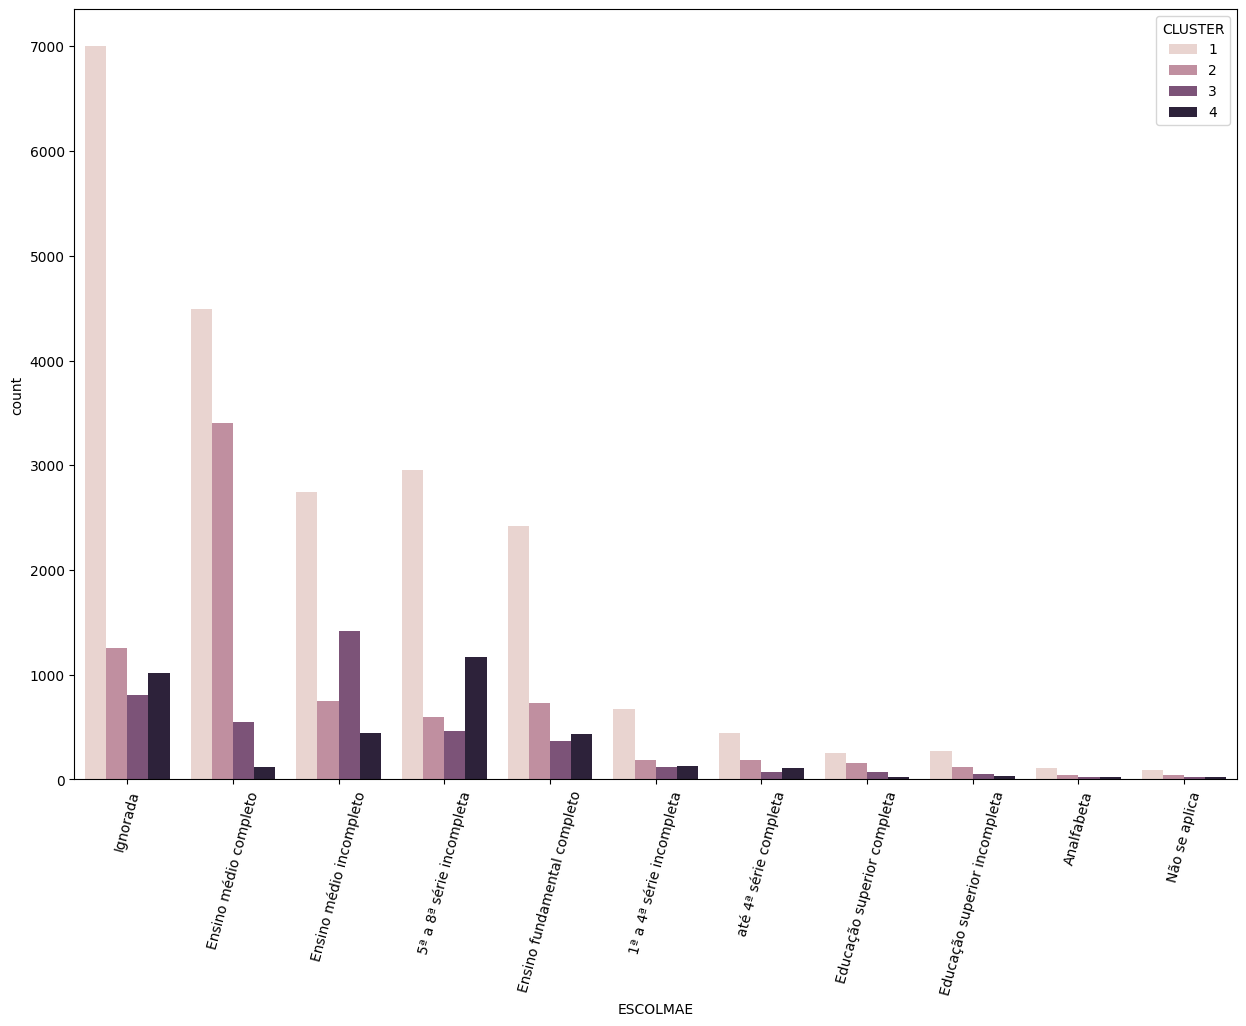

In [120]:
plt.subplots(figsize = (15,10))
sns.countplot(x = data['ESCOLMAE'], order = data['ESCOLMAE'].value_counts().index, hue = data['CLUSTER'])
plt.xticks(rotation=75)
plt.show

<ipython-input-121-432b192903a5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels=["No pré-natal", "No parto/curetagem", "Após o parto", "Ignorado", "Não realizado"], rotation=60)


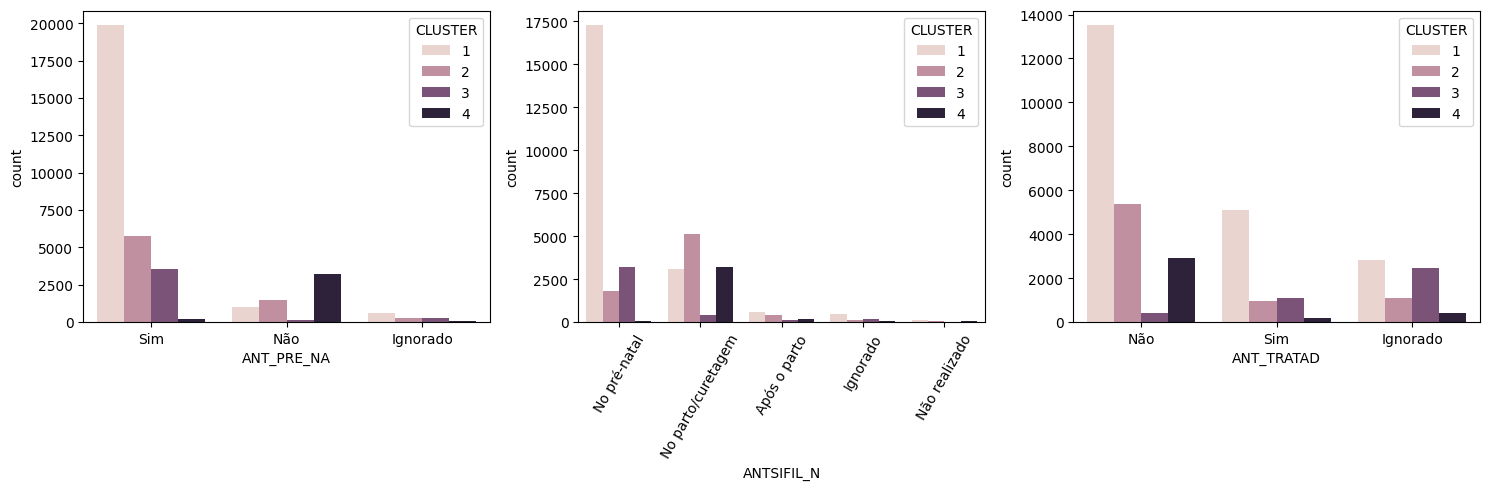

In [121]:
f, axs = plt.subplots(1, 3, figsize = (15,5))

sns.countplot(x = data['ANT_PRE_NA'], order = data['ANT_PRE_NA'].value_counts().index, hue = data['CLUSTER'], ax = axs[0])
g = sns.countplot(x = data['ANTSIFIL_N'], order = data['ANTSIFIL_N'].value_counts().index, hue = data['CLUSTER'], ax = axs[1])
sns.countplot(x = data['ANT_TRATAD'], order = data['ANT_TRATAD'].value_counts().index, hue = data['CLUSTER'], ax = axs[2])

g.set_xticklabels(labels=["No pré-natal", "No parto/curetagem", "Após o parto", "Ignorado", "Não realizado"], rotation=60)


plt.tight_layout()
plt.show()

<ipython-input-37-2d542c7e00b5>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(labels=["Inadequado",  "Não realizado", "Ignorado", "Adequado"], rotation=60)
<ipython-input-37-2d542c7e00b5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  i.set_xticklabels(labels=["Vivo",  "Aborto", "Natimorto", "Ignorado", "Óbito por sífilis congênita", "Óbito por outras causas"], rotation=60)
<ipython-input-37-2d542c7e00b5>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  j.set_xticklabels(labels=["Sífilis congênita recente", "Aborto", "Natimorto", "Sífilis tardia"], rotation=60)


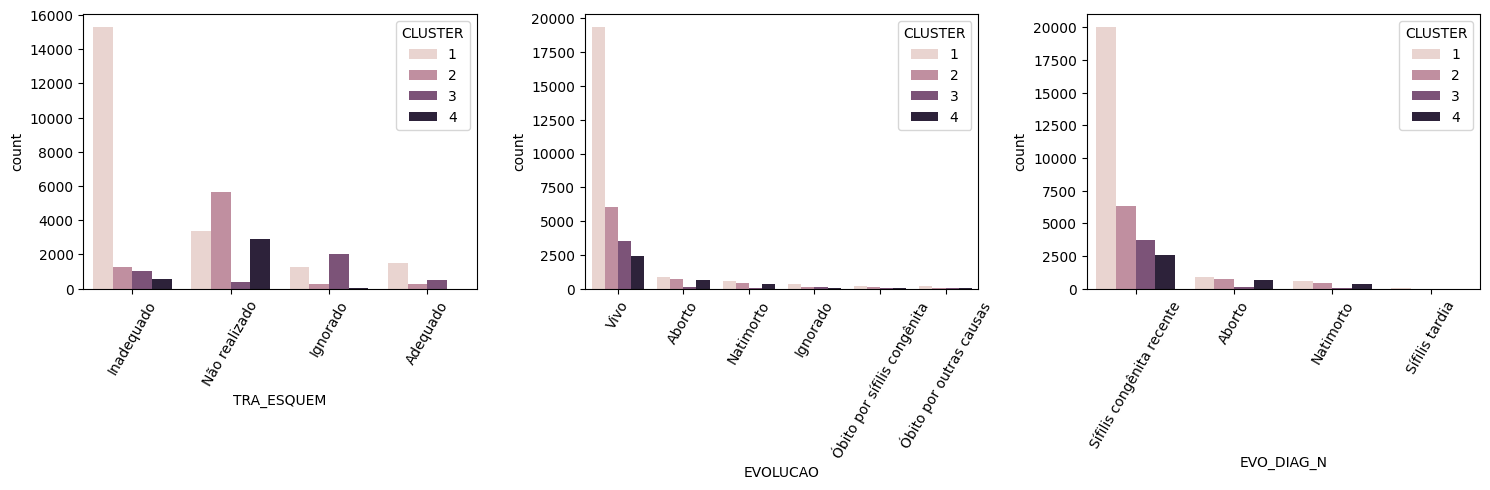

In [37]:
f, axs = plt.subplots(1, 3, figsize = (15, 5))
h = sns.countplot(x = data['TRA_ESQUEM'], order = data['TRA_ESQUEM'].value_counts().index, hue = data['CLUSTER'], ax = axs[0])
i = sns.countplot(x = data['EVOLUCAO'], order = data['EVOLUCAO'].value_counts().index, hue = data['CLUSTER'], ax = axs[1])
j = sns.countplot(x = data['EVO_DIAG_N'], order = data['EVO_DIAG_N'].value_counts().index, hue = data['CLUSTER'], ax = axs[2])

h.set_xticklabels(labels=["Inadequado",  "Não realizado", "Ignorado", "Adequado"], rotation=60)
i.set_xticklabels(labels=["Vivo",  "Aborto", "Natimorto", "Ignorado", "Óbito por sífilis congênita", "Óbito por outras causas"], rotation=60)
j.set_xticklabels(labels=["Sífilis congênita recente", "Aborto", "Natimorto", "Sífilis tardia"], rotation=60)


plt.tight_layout()
plt.show()